# 1. Preguntas

## 1.1. _¿Qué quiere decir que un problema sea NP-Hard?_

Que es al menos tan difícil como el más difícil de los problemas en $NP$.

Todo problema $L$ en $NP$ se puede reducir en tiempo polinomial al problema _NP-Hard_.

Para un problema _NP-Hard_, es más fácil chequear una solución existente que llegar a una solución desde 0.

## 1.2. _¿Qué quiere decir que $P \neq NP$?_

Quiere decir que no existen algoritmos que resuelvan problemas en $NP$ en tiempo polinomial.

## 1.3. _¿Cómo se prueba que un problema es NP-Hard usando reducciones?_

Para probar que un problema $A$ es _NP-Hard_, se usa otro problema $B$ que se sabe que es _NP-Hard_ y se debe probar que se puede transformar el problema $B$ en $A$.

Esta transformación debe probarse que se realiza en tiempo polinomial.

# 2. Problemas _NP-Hard_

## 2.1. Buscaminas

### 2.1.1. Descripción del juego

Se tiene un tablero de tamaño determinado con sus casillas cubiertas. Se comienza el juego seleccionando y descubriendo una de ellas: si hay una mina, se pierde el juego y hay que comenzar otro y si no es una mina, la casilla revelará un número que indica la cantidad de minas que hay a su alrededor (desde 0 (casilla no muestra número) hasta 8). El objetivo del juego es descubrir todas las casillas seguras de tal manera de no seleccionar una mina.

#### 2.1.1.1. Ejemplo de juego completado

![minesweeper](https://minesweepergame.com/image/strategy/windows-xp-minesweeper.png)

#### 2.1.1.2. Algunos patrones conocidos

![minesweeper](https://minesweepergame.com/image/strategy/pattern-1.png)

El 1 seleccionado toca solo 1 casilla oculta, así que debe ser una mina.

![minesweeper](https://minesweepergame.com/image/strategy/pattern-2.png)

El 2 seleccionado toca justo 2 casillas ocultas, por lo que ambas son minas.

![minesweeper](https://minesweepergame.com/image/strategy/pattern-3.png)

Caso con 3 minas.

![minesweeper](https://minesweepergame.com/image/strategy/pattern-4.png)

Caso con 4 minas.

#### 2.1.1.3. Casos no seguros: **Problema de consistencia**

Existen casos en los que no se puede determinar con certeza si una casilla es una bomba o no, independiente de las pistas entregadas por casillas adyacentes.

![minesweeper](https://minesweepergame.com/image/strategy/guessing-unavoidable-1.png)

Las casillas en rojo tienen un 50% de probabilidad de ser una mina y no hay seguridad de escoger la correcta.

![minesweeper](https://minesweepergame.com/image/strategy/guessing-complex-1.png)

3 opciones locales con 50% de probabilidad.

![minesweeper](https://minesweepergame.com/image/strategy/guessing-complex-2.png)

3 opciones locales con 66/33% de probabilidad.

## 2.2. Problema de la mochila (Knapsack)

### 2.2.1. Descripción

Presenta un conjunto de objetos con pesos positivos $w_i$ y sus respectivos valores $v_i$, una capacidad de la mochila $b$ y un valor $c$. La idea es llenar la mochila sin sobrepasar el peso $b$ logrando obtener al menos el valor $c$.

La pregunta es si existe un subconjunto $I$ de objetos tales que:

$\sum\limits_{i \in I} w_i \leq b$

$\sum\limits_{i \in I} v_i \geq c$

# 3. Demostraciones

## 3.1. Teorema: Problema de Consistencia de Buscaminas

_El problema de consistencia de Buscaminas es NP-Completo._

### 3.1.1. Tablero infinito

Se genera una cuadrícula de Buscaminas infinitamente grande. En ella se pueden generar distintas estructuras con propiedades particulares como las detalladas a continuación.

#### 3.1.1.1. Cables

Una configuración posible es un "cable", infinitamente largo hacia la izquierda y hacia la derecha. En él, cada par de casillas ocultas tienen un 50% de probabilidad de ser una bomba. Si una casilla $x$ resulta ser una mina, todas las casillas $x$ serán minas. Análogamente, si una $x'$ es una mina, todas las $x'$ serán minas.

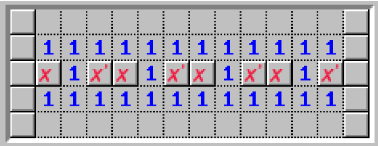

#### 3.1.1.2. Compuertas lógicas

Compuerta AND

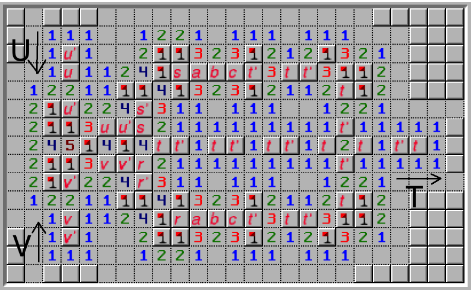

Si $u$ y $v$ son minas, entonces $t$ será una mina.

Si $u'$ y $v'$ son minas, $t$ será una mina.

Con $u$ y $v'$, o $u'$ y $v$, $t'$ será una mina.

Compuerta OR

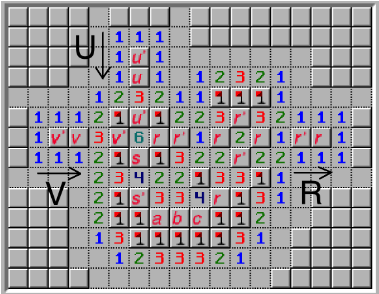

Al menos una de las 2 variables, $u$ o $v$, deben ser una mina para resultar en $t$. Si ambas son $u'$ y $v'$, entonces $t'$ será una mina.

Compuerta NOT

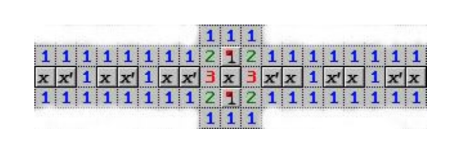

Si $x$ es una mina, a la salida se tendrá que $x'$ será una mina y viceversa.

### 3.1.2. Demostración

_Reducción al problema de satisfacibilidad de circuitos (CIRCUIT-SAT)._

Es posible construir compuertas AND, OR y NOT, además de los "cables", en el Buscaminas. Se puede asignar una mina al final (escencialmente transformando su valor a Verdadero por defecto).

Asumiendo que se tiene un algoritmo que chequea la consistencia en tiempo polinomial, se puede determinar un valor booleano (hay una mina o no) que se mantendrá contante dada nuestra asignación de la mina final.

_CIRCUIT-SAT_:

Se asume que se tiene un circuito booleano arbitrario que acepta $x_1$, $x_2$, ..., $x_n$ como entrada y entrega $y$ como salida. Este circuito tendrá una serie de configuraciones AND, OR y NOT, las que entregan V o F dependiendo de sus entradas.

Se quiere conocer los valores iniciales de cada entrada de tal manera de garantizar que $y$ sea V.

Entonces, si se tiene un circuito booleano arbitrario, es posible transcribir todas las compuertas usando las ANR, OR y NOT descritas construidas en el buscaminas, usando también como conexión el cable de minas descrito igualmente.

Como se sabe que CIRCUIT-SAT es _NP-Hard_, se demuestra que el problema de consistencia de Buscaminas es _NP-Hard_.

### 3.1.3. Algoritmo para reducir

**Preproceso**: Dado un circuito booleano arbitrario y un tablero lo suficientemente grande de buscaminas, se copia el circuito usando minas y casillas seguras usando las estructuras descritas en el punto 3.1.1.2. Dichas estructuras luego se unen usando los cables descritos en 3.1.1.1. Se agrega una mina al final del circuito (cosa de hacer Verdadera la salida del circuito, como es descrito C-SAT). La transcripción se realiza en tiempo polinomial, dado que basca con recorrer el tablero de buscaminas (matriz 2x2) al copiar las estructuras.

Se asignan valores a los cables de entrada (cantidad de variables a usar) y se busca la configuración que satisfaga el sistema de tal manera de que la última mina esté correctamente definida.

**Postproceso**: Luego, el resultado de la configuración del buscaminas corresponde a la configuración inicial de C-SAT: los cables de entrada en buscaminas corresponden a las variables de entrada en C-SAT, por lo que si se encuentra una configuración de cables que satisface el buscaminas, dicha solución en C-SAT también será válida.

## 3.2. Teorema: el problema de la mochila es NP-Hard

### 3.2.1. Demostración

Se reduce SUBSET-SUM $\leq_p$ KNAPSACK. Para la instancia de SUBSET-SUM dada por $A={a_1, ..., a_n}$ y $S$. Se crea la instancia de KNAPSACK con (preproceso):

$w_i=v_i=a_i$,

$b=c=S$.

Dichos resultados se vuelven a escribir en parámetros de SUBSET-SUM (postorden).

Como se logra reducir un problema con otro en tiempo polinomial, entonces KNAPSACK es _NP-Hard_.

# 4. Algoritmos

## 4.1. Buscaminas

El algoritmo que se propone es el mismo que se usa para resolver uno normalmente (casillas con 100/0 % de probabilidad).

Para todas las casillas que no se puedan determinar correctamente, generar una tabla de probabilidades por cada casilla e ir marcando como minas las de mayor probabilidad hacia las de menos según la cantidad de minas que queden.

![minesweeper](https://minesweepergame.com/image/strategy/guessing-complex-3.png)

## 4.2. Knapsack

A costa de su correctitud, se puede programar un algoritmo _greedy_ para 0-1 Knapsack, con complejidad $O(n \log n)$. Esto quiere decir que encontrará una solución en tiempo polinomial, pero no necesariamente la correcta.